In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


path = 'test_results/BCICompet2a'

In [2]:
results = os.listdir(path)
results = [element for element in results if 'all_' not in element]
results

['2023-12-11_14-33-07-attn-1.csv',
 '2023-12-11_14-45-01-cat-2.csv',
 '2023-12-11_15-01-18-avg-0.csv',
 '2023-12-11_16-33-05-ftr-1.csv',
 '2023-12-11_16-47-45-baseline-1.csv']

In [3]:
columns = ['Subject', 'Accuracy', 'Kappa']
dfs = [pd.read_csv(os.path.join(path, result)) for result in results]
for df in dfs:
    df.columns = columns
for i in range(len(dfs)):
    dfs[i]['method'] = results[i].split('-')[-2].split('.')[0]
concat_df = pd.concat(dfs)

In [4]:

# Create Accuracy DataFrame
accuracy_df = concat_df.pivot(index='Subject', columns='method', values='Accuracy')

# Create Kappa DataFrame
kappa_df = concat_df.pivot(index='Subject', columns='method', values='Kappa')

In [5]:
# Calculate mean and standard deviation for Accuracy and Kappa
accuracy_mean = accuracy_df.mean()
accuracy_std = accuracy_df.std()
kappa_mean = kappa_df.mean()
kappa_std = kappa_df.std()

# Append mean and standard deviation to the DataFrames
accuracy_df.loc['Mean'] = accuracy_mean
accuracy_df.loc['Std'] = accuracy_std
kappa_df.loc['Mean'] = kappa_mean
kappa_df.loc['Std'] = kappa_std

In [6]:
accuracy_df

method,attn,avg,baseline,cat,ftr
Subject,,,,,
0,0.812500,0.815972,0.791667,0.777778,0.843750
1,0.482639,0.503472,0.489583,0.506944,0.506944
2,0.868056,0.878472,0.885417,0.871528,0.895833
3,0.701389,0.694444,0.708333,0.715278,0.708333
4,0.645833,0.690972,0.659722,0.677083,0.652778
5,0.579861,0.635417,0.579861,0.618056,0.625000
6,0.829861,0.847222,0.802083,0.795139,0.826389
7,0.819444,0.802083,0.826389,0.857639,0.840278
8,0.760417,0.760417,0.722222,0.756944,0.763889


In [7]:
kappa_df

method,attn,avg,baseline,cat,ftr
Subject,,,,,
0,0.750000,0.754630,0.722222,0.703704,0.791667
1,0.310185,0.337963,0.319444,0.342593,0.342593
2,0.824074,0.837963,0.847222,0.828704,0.861111
3,0.601852,0.592593,0.611111,0.620370,0.611111
4,0.527778,0.587963,0.546296,0.569444,0.537037
5,0.439815,0.513889,0.439815,0.490741,0.500000
6,0.773148,0.796296,0.736111,0.726852,0.768519
7,0.759259,0.736111,0.768519,0.810185,0.787037
8,0.680556,0.680556,0.629630,0.675926,0.685185


C:\Users\Nemes\AppData\Local\Temp\ipykernel_10944\522102042.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=kappa_df.drop(['Mean', 'Std']), ci=None, color='#5F9EA0')


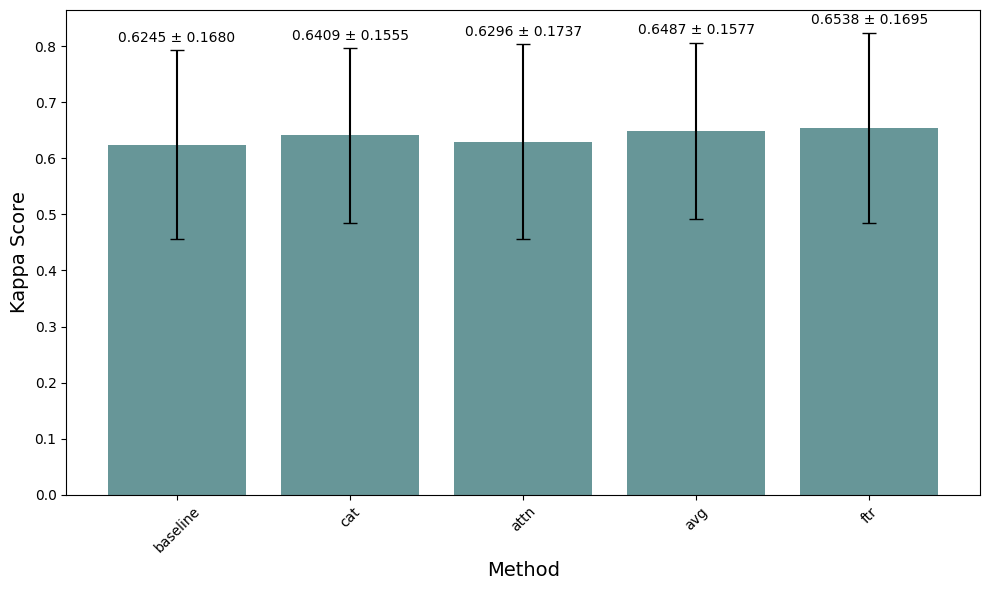

In [12]:

# Rename '3' to 'baseline'
kappa_df.rename(columns={'3': 'baseline'}, inplace=True)

# Reorder the columns
kappa_df = kappa_df[['baseline', 'cat', 'attn', 'avg', 'ftr']]

# Plot with the specified color
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=kappa_df.drop(['Mean', 'Std']), ci=None, color='#5F9EA0')

# Add error bars
for i, method in enumerate(kappa_df.columns):
    plt.errorbar(i, kappa_df.loc['Mean', method], yerr=kappa_df.loc['Std', method], fmt='none', c='black', capsize=5)
    # Annotate mean and std
    ax.text(i, kappa_df.loc['Mean', method] + kappa_df.loc['Std', method] + 0.01, 
            f"{kappa_df.loc['Mean', method]:.4f} ± {kappa_df.loc['Std', method]:.4f}", 
            ha='center', va='bottom', fontsize=10, color='black')

# Customize the plot
ax.set_xlabel('Method', fontsize=14)
ax.set_ylabel('Kappa Score', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
